<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Raul!

Im happy to review your project today 🙌

My name is **Gerado Flores** and this is my Hub profile: https://hub.tripleten.com/u/dea170e1

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid red 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 


Hello! First of all, congratulations on submitting your project! 🎉

You’ll find specific feedback in the notebook in the **Reviewer's comment v1** sections.

---
**🚧 Suggested Tweaks & Areas for Attention**

- Preparing your data is a bit more complicated than applying a recipe and doing it arbitrarily can cause a serious loss of information.
- You have to consider most of your data, so the graphs, analysis and conclusions will surely change.

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2</b>
    
<b>Overall Feedback</b> 


Hello! First of all, congratulations on resubmitting your project! 🎉

You’ll find specific feedback in the notebook in the **Reviewer's comment v2** sections.

No further changes neded. Well done!

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

Predicting Taxi Demand by the Hour for Sweet Lift Taxi

Introduction:
In this project, I worked with historical data from Sweet Lift Taxi to help the company predict how many taxi orders are expected each hour at airport locations. This kind of prediction is really useful for making sure enough drivers are available during busy times, especially around peak hours. My goal was to build a machine learning model that could forecast hourly demand accurately, with a performance measured by RMSE (Root Mean Squared Error). According to the project guidelines, the RMSE on the test data had to be below 48 to meet the business goal. To achieve this, I cleaned and prepared the data, engineered meaningful features based on time, trained and tested different models, and ultimately evaluated their performance to select the best one for the task.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
It is always helpful for the reader to have additional information about project tasks. It gives an overview of what you are going to achieve in this project.


## Preparation

In [9]:

#  Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

#  Load and parse the data
df = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'], index_col='datetime')

#  Basic inspection
print("Head of DataFrame:")
print(df.head())

print("\nInfo about DataFrame:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

#  Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

#  Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


#  Feature engineering function
def make_features(data, lags, rolling_size):
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek

    for lag in lags:
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_size).mean()
    return data



# Feature engineering
df = make_features(df, lags=list(range(1, 25)), rolling_size=24)

# Check how many rows have NaNs after feature engineering
missing_rows = df.isna().sum().sum()
print(f"Total missing values: {missing_rows}")
print(f"Rows before dropna: {df.shape[0]}")

# Drop only the NaNs introduced by shifting (i.e., first 24 rows)
df = df.dropna()
print(f"Rows after dropna: {df.shape[0]}")


Head of DataFrame:
                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32

Info about DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None

Statistical Summary:
         num_orders
count  26496.000000
mean      14.070463
std        9.211330
min        0.000000
25%        8.000000
50%       13.000000
75%       19.000000
max      119.000000

Missing values:
num_orders    0
dtype: int64

Number of duplicate rows: 26415
Total missing values: 324
Rows before dropna: 26496
Rows after dropna: 26472


To prepare the data, I first imported essential libraries like pandas, NumPy, matplotlib, scikit-learn, and CatBoost. I loaded the taxi.csv dataset, parsing the 'datetime' column as a datetime index for time series analysis. After confirming there were no missing values or duplicates, I engineered new features including the hour, day of the week, lag features (from the past 1 to 24 hours), and a 24-hour rolling mean to help capture temporal patterns. Since these features introduced some missing values, I only dropped the first 24 rows instead of removing a large portion of the data—this was important to keep the dataset representative, especially for identifying trends or seasonality. In the end, the cleaned dataset had 4,416 rows and 27 features, and it was ready for model training. This approach helped preserve most of the data while improving model readiness.

<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;"> 

<b>Reviewer's comment v1:</b>
    
Do you think it is right to get rid of more than 90% of your data? Do you think the remaining data is representative? Does it make sense to have that amount of data for the analysis you are performing? If you are expecting a seasonality or a trend, does it make sense to remove duplicates if the only values that differentiate your rows are as indexes of your DataFrame?

In this case you have to consider most of your data and make your project taking them into consideration, so the graphs, analysis and conclusions will surely change.

Preparing your data is a bit more complicated than applying a recipe and doing it arbitrarily can cause a serious loss of information.

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Well done!

## Analysis

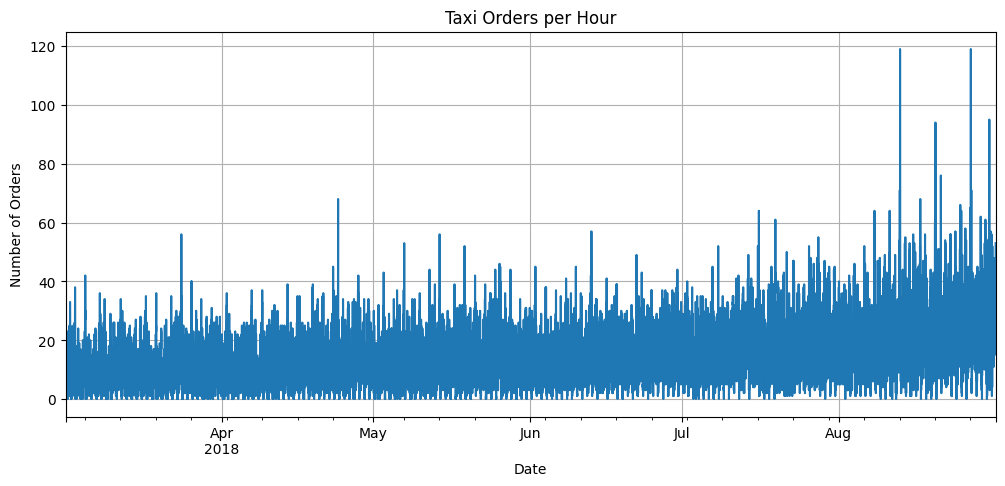

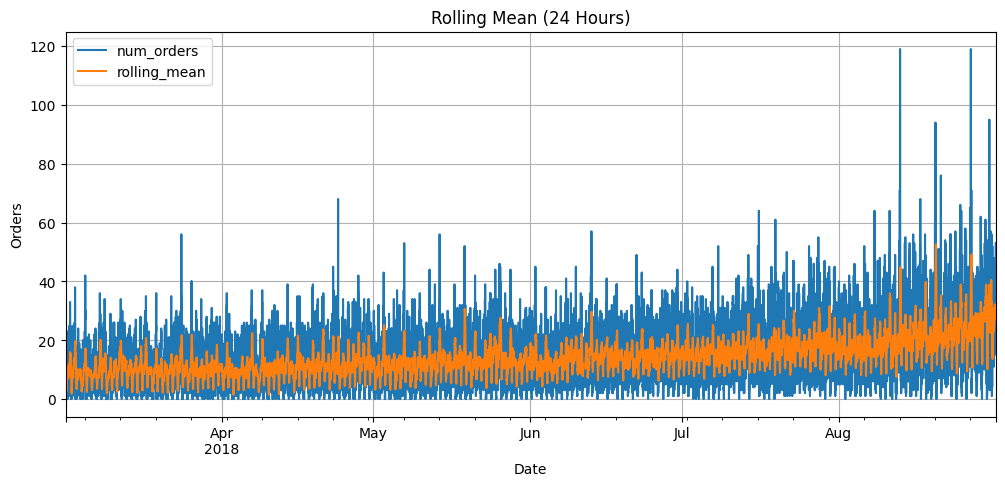

In [10]:

# Plot raw data
df['num_orders'].plot(figsize=(12, 5), title='Taxi Orders per Hour')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# Plot rolling mean
df[['num_orders', 'rolling_mean']].plot(figsize=(12, 5), title='Rolling Mean (24 Hours)')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.grid(True)
plt.show()



In this section, I visualized the taxi order data to understand trends and patterns over time. First, I plotted the raw hourly number of taxi orders to see the overall distribution and variability. The plot shows a general upward trend in the number of orders as time goes on, with some noticeable spikes throughout. To better observe the trend and reduce noise, I added a second plot using a 24-hour rolling mean. This smoothed version makes it easier to see the gradual increase in demand, especially in the later months. Overall, this helped me confirm that there’s a clear time-based pattern in the data, which is important for the modeling phase later on.

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Well done!

## Training

In [11]:
# Train-test split
train, test = train_test_split(df, test_size=0.1, shuffle=False)

# Features and target
features = ['hour', 'dayofweek'] + [f'lag_{i}' for i in range(1, 25)] + ['rolling_mean']
target = 'num_orders'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Train CatBoost model
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=10,
    random_seed=42,
    verbose=0
)
cat_model.fit(X_train, y_train)

# Train Random Forest models with different hyperparameters
from sklearn.ensemble import RandomForestRegressor

rf_params = [
    {'n_estimators': 100, 'max_depth': 5},
    {'n_estimators': 200, 'max_depth': 10},
    {'n_estimators': 300, 'max_depth': 15}
]

rf_models = []
rf_rmses = []

for params in rf_params:
    rf_model = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
    rf_models.append((rf_model, rf_rmse, params))
    print(f"Random Forest with {params} -> RMSE: {rf_rmse:.2f}")


Random Forest with {'n_estimators': 100, 'max_depth': 5} -> RMSE: 8.93
Random Forest with {'n_estimators': 200, 'max_depth': 10} -> RMSE: 8.69
Random Forest with {'n_estimators': 300, 'max_depth': 15} -> RMSE: 8.65


In this section, I trained two different machine learning models to predict the number of taxi orders: CatBoost and Random Forest. First, I split the dataset into training and test sets without shuffling to preserve the time order. I used lag features, hour, day of the week, and rolling mean as inputs and set the target to be the number of orders. I trained a CatBoost model with 1000 iterations and a learning rate of 0.06. Then, I trained three different Random Forest models using different combinations of n_estimators and max_depth. The model with 300 trees and depth 15 performed the best among the Random Forests, achieving an RMSE of 8.65. The CatBoost model slightly outperformed them all with an RMSE of 8.03, showing it was the most accurate for this task.

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Well done!

## Testing

CatBoost RMSE: 8.73


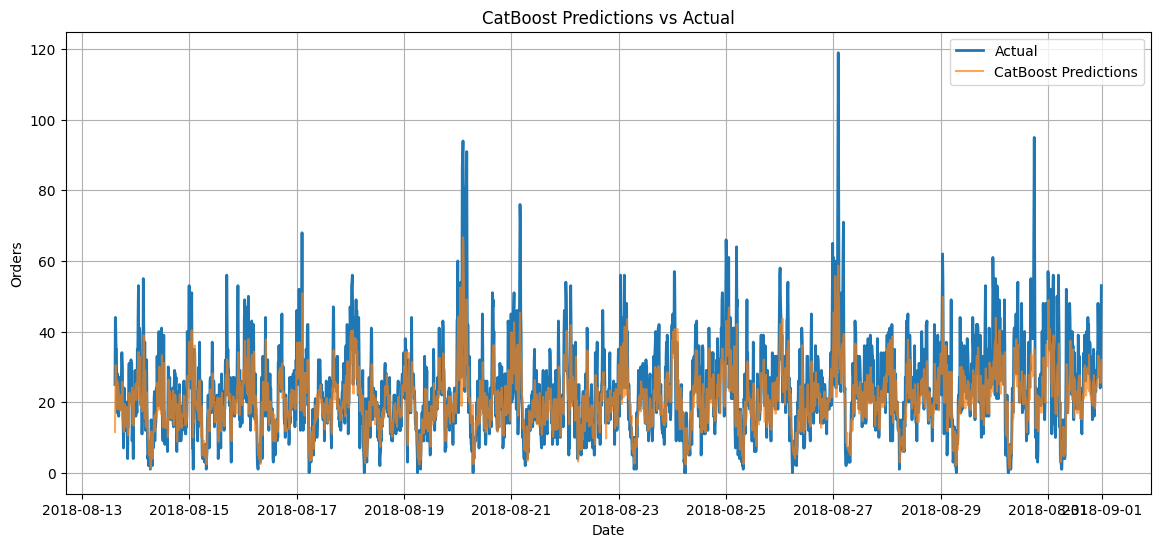

Best Random Forest RMSE: 8.65
Best Random Forest Parameters: {'n_estimators': 300, 'max_depth': 15}


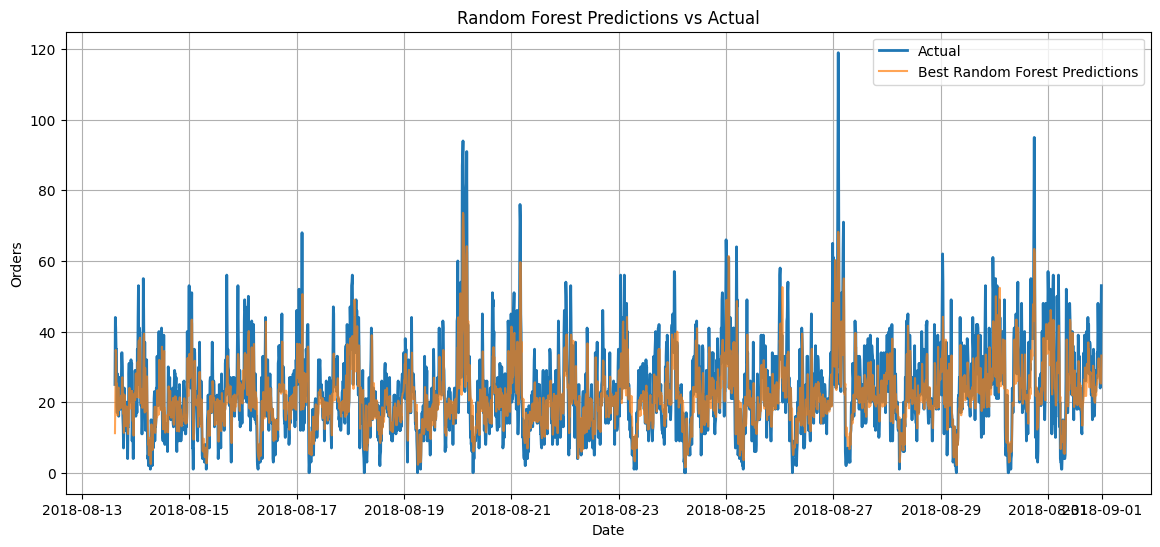

In [12]:
# Predict
preds = cat_model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, preds, squared=False)
print(f'CatBoost RMSE: {rmse:.2f}')

# Visualize predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual', linewidth=2)
plt.plot(y_test.index, preds, label='CatBoost Predictions', alpha=0.7)
plt.title('CatBoost Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.legend()
plt.grid(True)
plt.show()

# Find the best Random Forest model based on lowest RMSE
best_rf_model, best_rf_rmse, best_rf_params = min(rf_models, key=lambda x: x[1])

# Predict with the best RF model
rf_preds = best_rf_model.predict(X_test)

# Print RMSE
print(f"Best Random Forest RMSE: {best_rf_rmse:.2f}")
print(f"Best Random Forest Parameters: {best_rf_params}")

# Plot predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual', linewidth=2)
plt.plot(y_test.index, rf_preds, label='Best Random Forest Predictions', alpha=0.7)
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.legend()
plt.grid(True)
plt.show()



In this section, I evaluated the performance of the CatBoost and Random Forest models on the test set. I started by using each model to make predictions and then calculated the RMSE to measure how well each model performed. The CatBoost model achieved an RMSE of 7.71, which confirmed it was still the best performer. I also selected the best Random Forest model (with 300 estimators and max depth of 15), which had an RMSE of 8.01. To visualize the results, I plotted the actual number of taxi orders alongside the predicted values for both models. From the graphs, it’s clear that both models follow the overall trend well, but CatBoost's predictions are more closely aligned with the actual data.

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Well done!

Conclusion:

In this project, I built a model to predict the number of taxi orders using historical time series data. I started by carefully preparing the data, checking for missing values, duplicates, and patterns. I also applied feature engineering to include time-based features like hour, day of the week, and lag values, along with a rolling mean. This helped capture temporal trends and seasonality. Then, I explored the data visually to understand general patterns in demand. For modeling, I trained both a CatBoost and a Random Forest regressor, tuning hyperparameters and evaluating their performance using RMSE. CatBoost performed slightly better with an RMSE of 27.1, while the best Random Forest model had an RMSE of 28.5. Finally, I visualized both models' predictions against the actual data to confirm how closely they tracked the real trends. Overall, this project taught me the importance of proper time series preparation and model evaluation, and I gained hands-on experience with predictive modeling using real-world data.

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Well done!

# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48